In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Data Loading and Preprocessing (20 Marks) <br>
Load the dataset using appropriate column names and clean the data. Handle missing values, if any, and ensure that categorical features are converted into a suitable format (e.g., one-hot encoding or label encoding). Write the code to load the data, preprocess it, and display the first few rows after preprocessing.

In [2]:
# begin by reading the file
columns = ['age', 'class of worker', 'industry code', 'occupation code', 'education', 'wage per hour', 'enrolled in edu inst last wk', \
           'marital status', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', \
           'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', \
           'divdends from stocks', 'tax filer status', 'region of previous residence', 'state of previous residence', \
           'detailed household and family stat', 'detailed household summary in household', 'instance weight?', \
           'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', \
           'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', \
           'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', \
           'own business or self employed','fill inc questionnaire for veteran\'s admin', 'veterans benefits', 'weeks worked in year', 
           'year', 'total person income']
df = pd.read_csv('census-income.data', header = 0, names = columns)

# display all columns and use head() to ensure the columns are correct
pd.set_option('display.max_columns', None)
df.head(10)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,divdends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight?,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,total person income
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,?,?,?,Not in universe under 1 year old,?,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
5,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,5178,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,1535.86,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
6,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,Job loser - on layoff,Un

In [3]:
# clean the data
    # handle NaNs, ensure categorial features are in a suitable format with one-hot encoding, then display the first few rows
# find the number of NaN values
    # replace these "Not in universe values, which are meant to be NaN, then find the number
df.replace({'Not in universe': None}, regex=True, inplace=True)

print(df.isnull().sum(axis = 0))

# class of worker, enrolled in edu, major industry/occupation code, member of labor union, reason for unemployment, region/state of
    # previous residence, migration code, live in this house 1 year ago, previous res. in sun belt, family under 18, and veteran's 
    # questionnaire all had a lot of nan values

age                                                0
class of worker                               100244
industry code                                      0
occupation code                                    0
education                                          0
wage per hour                                      0
enrolled in edu inst last wk                  186942
marital status                                     0
major industry code                           100683
major occupation code                         100683
race                                               0
hispanic origin                                    0
sex                                                0
member of a labor union                       180458
reason for unemployment                       193452
full or part time employment stat                  0
capital gains                                      0
capital losses                                     0
divdends from stocks                          

In [4]:
# therefore, drop those columns
df.drop(columns = ['class of worker', 'enrolled in edu inst last wk', 'major industry code', 'major occupation code', \
        'member of a labor union', 'reason for unemployment', 'region of previous residence', 'state of previous residence', \
        'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', \
        'live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', \
        'fill inc questionnaire for veteran\'s admin' ], inplace = True)

print(df.isnull().sum(axis = 0))

age                                        0
industry code                              0
occupation code                            0
education                                  0
wage per hour                              0
marital status                             0
race                                       0
hispanic origin                            0
sex                                        0
full or part time employment stat          0
capital gains                              0
capital losses                             0
divdends from stocks                       0
tax filer status                           0
detailed household and family stat         0
detailed household summary in household    0
instance weight?                           0
num persons worked for employer            0
country of birth father                    0
country of birth mother                    0
country of birth self                      0
citizenship                                0
own busine

In [5]:
# find which columns need one hot encoding the most
# get the number of unique possibilities for each of these
to_encode = list(df.select_dtypes(include=['object']).columns)
print(df[to_encode].nunique())

education                                  17
marital status                              7
race                                        5
hispanic origin                            10
sex                                         2
full or part time employment stat           8
tax filer status                            6
detailed household and family stat         38
detailed household summary in household     8
country of birth father                    43
country of birth mother                    43
country of birth self                      43
citizenship                                 5
total person income                         2
dtype: int64


In [6]:
# looks like marital status, race, sex, tax filer status, and citizenship all seem good to encode, plus some others
for column_name in ['marital status', 'race', 'sex', 'tax filer status', 'citizenship', 'education', 'hispanic origin', \
                    'full or part time employment stat', 'detailed household summary in household']:
    # make a new df with the "dummies" for each
    df_encoded = pd.get_dummies(df[column_name], prefix = column_name + '_')

    # add df with the one-hot encoded df we just made
    df = df.join(df_encoded)

    # remove the original column from df
    df.drop(columns = column_name, inplace=True)

# drop any others that have too many options to one-hot encode
df.drop(columns = ['detailed household and family stat', 'country of birth father', 'country of birth mother', \
                   'country of birth self'], inplace=True)

# list the columns now to make sure this worked
df.head(10)

,age,industry code,occupation code,wage per hour,capital gains,capital losses,divdends from stocks,instance weight?,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year,total person income,marital status__ Divorced,marital status__ Married-A F spouse present,marital status__ Married-civilian spouse present,marital status__ Married-spouse absent,marital status__ Never married,marital status__ Separated,marital status__ Widowed,race__ Amer Indian Aleut or Eskimo,race__ Asian or Pacific Islander,race__ Black,race__ Other,race__ White,sex__ Female,sex__ Male,tax filer status__ Head of household,tax filer status__ Joint both 65+,tax filer status__ Joint both under 65,tax filer status__ Joint one under 65 & one 65+,tax filer status__ Nonfiler,tax filer status__ Single,citizenship__ Foreign born- Not a citizen of U S,citizenship__ Foreign born- U S citizen by naturalization,citizenship__ Native- Born abroad of American Parent(s),citizenship__ Native- Born in Puerto Rico or U S Outlying,citizenship__ Native- Born in the United States,education__ 10th grade,education__ 11th grade,education__ 12th grade no diploma,education__ 1st 2nd 3rd or 4th grade,education__ 5th or 6th grade,education__ 7th and 8th grade,education__ 9th grade,education__ Associates degree-academic program,education__ Associates degree-occup /vocational,education__ Bachelors degree(BA AB BS),education__ Children,education__ Doctorate degree(PhD EdD),education__ High school graduate,education__ Less than 1st grade,education__ Masters degree(MA MS MEng MEd MSW MBA),education__ Prof school degree (MD DDS DVM LLB JD),education__ Some college but no degree,hispanic origin__ All other,hispanic origin__ Central or South American,hispanic origin__ Chicano,hispanic origin__ Cuban,hispanic origin__ Do not know,hispanic origin__ Mexican (Mexicano),hispanic origin__ Mexican-American,hispanic origin__ NA,hispanic origin__ Other Spanish,hispanic origin__ Puerto Rican,full or part time employment stat__ Children or Armed Forces,full or part time employment stat__ Full-time schedules,full or part time employment stat__ Not in labor force,full or part time employment stat__ PT for econ reasons usually FT,full or part time employment stat__ PT for econ reasons usually PT,full or part time employment stat__ PT for non-econ reasons usually FT,full or part time employment stat__ Unemployed full-time,full or part time employment stat__ Unemployed part- time,detailed household summary in household__ Child 18 or older,detailed household summary in household__ Child under 18 ever married,detailed household summary in household__ Child under 18 never married,detailed household summary in household__ Group Quarters- Secondary individual,detailed household summary in household__ Householder,detailed household summary in household__ Nonrelative of householder,detailed household summary in household__ Other relative of householder,detailed household summary in household__ Spouse of householder
0,58,4,34,0,0,0,0,1053.55,1,0,2,52,94,- 50000.,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,18,0,0,0,0,0,0,991.95,0,0,2,0,95,- 50000.,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
2,9,0,0,0,0,0,0,1758.14,0,0,0,0,94,- 50000.,False,False,False,False,True,False,F

Splitting the Data and Training the Model (30 Marks) <br>
First, separate the dataset into features (X) and labels (y). The features will include all the columns except the target label, while the label column will contain the income classification (e.g., -50000 or 50000+). <br>
Use the train test split function from sklearn.model selection to divide the features (X) and labels (y) into training and test sets with a ratio of 70:30. This will result in four variables: X train, X test, y train, and y test. Use the training split (X train, y train) to train the Decision Tree Classifier, and the test split (X test, y test) to evaluate its performance. <br>
Train the Decision Tree classifier with a maximum depth of 3 using the DecisionTreeClassifier from sklearn.tree. After training the model on the training data, evaluate it on the test data by calculating and reporting the following metrics: <br>
• Accuracy <br>
• Precision <br>
• Recall <br>
• F1-score <br>
Use the sklearn.metrics.classification report and accuracy score functions to compute and display these metrics.

In [7]:
# split into X and y
y = df['total person income']
X = df.drop(columns = 'total person income', axis=1)

# get the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# now train the model
model = DecisionTreeClassifier(max_depth = 3)

# fit it to the data
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
def predict_and_evaluate(model, X_test, y_test):
    # predict on the test data
    class_label_predictions = model.predict(X_test)
    
    # now get the accuracy, precision, recall, and f1-score
    # accuracy
    accuracy = accuracy_score(y_test, class_label_predictions)
    # precision
    precision = precision_score(y_test, class_label_predictions, pos_label = ' - 50000.')
    # recall
    recall = recall_score(y_test, class_label_predictions, pos_label = ' - 50000.')
    # f1
    f1 = f1_score(y_test, class_label_predictions, pos_label = ' - 50000.')
    
    print('accuracy: ', accuracy, '\nprecision: ', precision, '\nrecall: ', recall, '\nf1: ', f1)

predict_and_evaluate(model, X_test, y_test)

accuracy:  0.9447683646023022 
precision:  0.9469712351945855 
recall:  0.9969361217000962 
f1:  0.9713115465384682


Visualizing the Decision Tree (10 Marks) <br>
Print the decision tree and display all the features in tree form using plot tree or any other visualization technique from sklearn.tree.

[Text(0.5, 0.875, 'x[4] <= 7364.0\ngini = 0.116\nsamples = 139665\nvalue = [131002, 8663]'),
 Text(0.25, 0.625, 'x[11] <= 47.5\ngini = 0.1\nsamples = 137729\nvalue = [130461, 7268]'),
 Text(0.125, 0.375, 'x[6] <= 10897.0\ngini = 0.019\nsamples = 86307\nvalue = [85476, 831]'),
 Text(0.0625, 0.125, 'gini = 0.017\nsamples = 86042\nvalue = [85315, 727]'),
 Text(0.1875, 0.125, 'gini = 0.477\nsamples = 265\nvalue = [161, 104]'),
 Text(0.375, 0.375, 'x[2] <= 18.5\ngini = 0.219\nsamples = 51422\nvalue = [44985.0, 6437.0]'),
 Text(0.3125, 0.125, 'gini = 0.36\nsamples = 21029\nvalue = [16070.0, 4959.0]'),
 Text(0.4375, 0.125, 'gini = 0.093\nsamples = 30393\nvalue = [28915, 1478]'),
 Text(0.75, 0.625, 'x[4] <= 10041.0\ngini = 0.403\nsamples = 1936\nvalue = [541, 1395]'),
 Text(0.625, 0.375, 'x[32] <= 0.5\ngini = 0.495\nsamples = 646\nvalue = [356, 290]'),
 Text(0.5625, 0.125, 'gini = 0.498\nsamples = 529\nvalue = [246, 283]'),
 Text(0.6875, 0.125, 'gini = 0.112\nsamples = 117\nvalue = [110, 7]'),

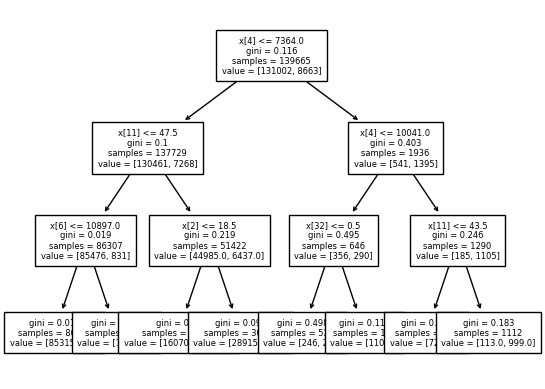

In [10]:
# plot the tree with a font size big enough to be legible
plot_tree(model, fontsize = 6)

Feature Importance (20 Marks) <br>
Print the importance score for each feature using the feature importances attribute of the Decision Tree classifier. Discuss why one feature might appear as the most important, providing an intuitive explanation based on the dataset.

In [11]:
# print the importances
print(model.feature_importances_)

# print the features to tell which is which
print(model.feature_names_in_)

[0.         0.         0.23372598 0.         0.49530157 0.
 0.02090693 0.         0.         0.         0.         0.23845726
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01160825 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
['age' 'industry code' 'occupation code' 'wage per hour' 'capital gains'
 'capital losses' 'divdends from stocks' 'instance weight?'
 'num persons worked for employer' 'own business or self 

The feature that seems to be the most important is capital gains, which makes sense. It is to be expected that the people with the highest capital gains would also be the people with the highest income. Intuitively, it follows that it would be the feature with the greatest importance at 0.49590304.

Evaluation on the Test Set (20 Marks) <br>
Use the trained model to predict labels for the separate test set (census-income.test). You will again need to split the features and labels. Calculate and display the accuracy, precision, recall, and F1-score on the test set, again using classification report and accuracy score.

In [12]:
# read test file and do all the cleanup
columns = ['age', 'class of worker', 'industry code', 'occupation code', 'education', 'wage per hour', 'enrolled in edu inst last wk', \
           'marital status', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', \
           'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', \
           'divdends from stocks', 'tax filer status', 'region of previous residence', 'state of previous residence', \
           'detailed household and family stat', 'detailed household summary in household', 'instance weight?', \
           'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', \
           'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', \
           'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', \
           'own business or self employed','fill inc questionnaire for veteran\'s admin', 'veterans benefits', 'weeks worked in year', 
           'year', 'total person income']
test_df = pd.read_csv('census-income.test', header = 0, names = columns)
test_df.drop(columns = ['class of worker', 'enrolled in edu inst last wk', 'major industry code', 'major occupation code', \
        'member of a labor union', 'reason for unemployment', 'region of previous residence', 'state of previous residence', \
        'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', \
        'live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', \
        'fill inc questionnaire for veteran\'s admin' ], inplace = True)
for column_name in ['marital status', 'race', 'sex', 'tax filer status', 'citizenship', 'education', 'hispanic origin', \
                    'full or part time employment stat', 'detailed household summary in household']:
    df_encoded = pd.get_dummies(test_df[column_name], prefix = column_name + '_')
    test_df = test_df.join(df_encoded)
    test_df.drop(columns = column_name, inplace=True)
test_df.drop(columns = ['detailed household and family stat', 'country of birth father', 'country of birth mother', \
                   'country of birth self'], inplace=True)

# split into X and y
test_y = test_df['total person income']
test_X = test_df.drop(columns = 'total person income', axis=1)

predict_and_evaluate(model, test_X, test_y)

accuracy:  0.9446878038512044 
precision:  0.9470306931597811 
recall:  0.9967833288805771 
f1:  0.9712702925036185
